In [66]:
from process_images import images_in_path, process_images, prepare_for_network, prediction, visualizable, plot_tensors
from hopfield import LayerInfo, SparseHopfield, train, loss
from typing import List
from matplotlib import pyplot as plt

In [67]:
layers: List[LayerInfo] = [
    LayerInfo(nodes=-1, memories=72),
    LayerInfo(nodes=3, memories=72),
    LayerInfo(nodes=1, memories=72)
]

In [68]:
chunk_length = 8
chunks_per_row = 12
num_rows = 64

In [69]:
path = "data"
images = process_images(images_in_path(path), chunk_length, chunks_per_row, num_rows, noise_level=0.3, noise_sample=10)

In [70]:
images.shape

torch.Size([70, 64, 96])

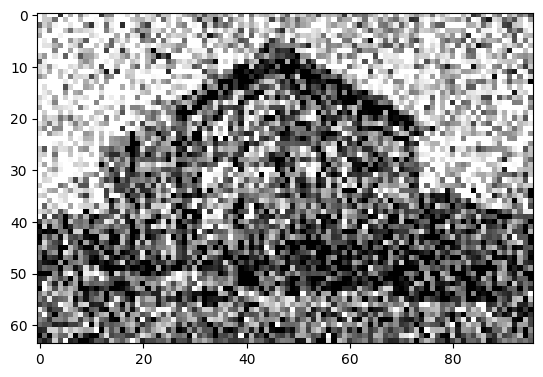

In [71]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray')

In [72]:
prepared, fields, field_dim, height, width = prepare_for_network(images, chunks_per_row, num_rows)

In [73]:
net = SparseHopfield(fields, field_dim, layers, alpha=16.0)

In [74]:
init_loss, _ = loss(net, prepared)

In [75]:
train(net, prepared)

In [76]:
trained_loss, _ = loss(net, prepared)

In [77]:
init_loss, trained_loss

(tensor(0.1146), tensor(2.4741e-12))

## Pristine Recall

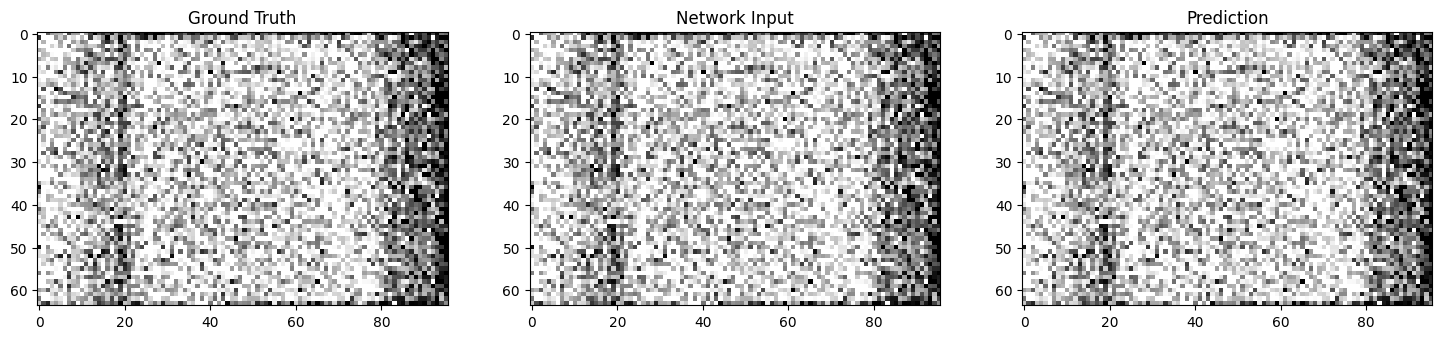

In [78]:
ground_truth = prepared[0].unsqueeze(0)
net_input = ground_truth
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [79]:
pred = net.predict(net_input)

In [83]:
pred = net.predict(pred)

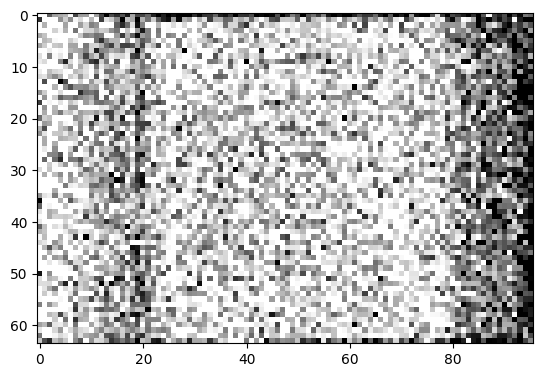

In [84]:
plt.imshow(prediction(pred.squeeze(), net, height, width), cmap='gray')

## Corruption - Replacement

In [13]:
from process_images import corruption_replace

### Low Noise

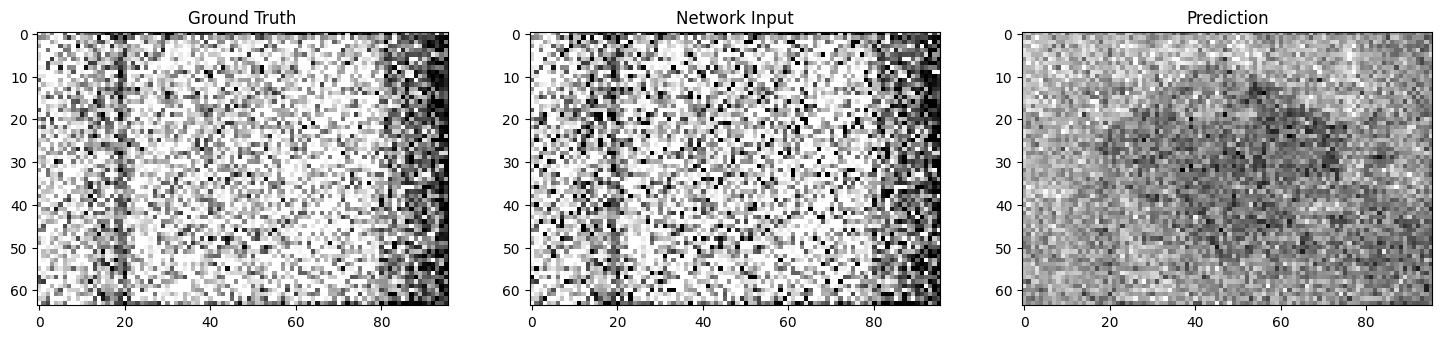

In [14]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

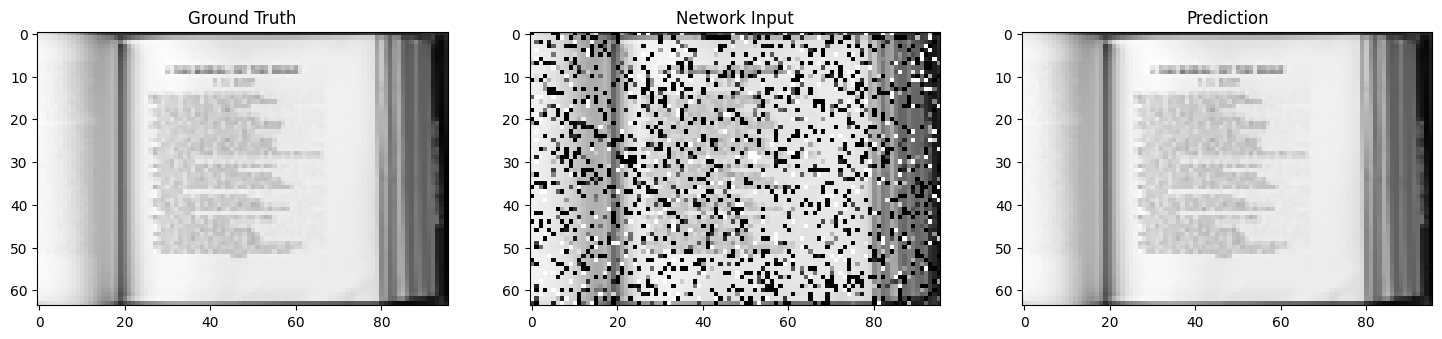

In [13]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

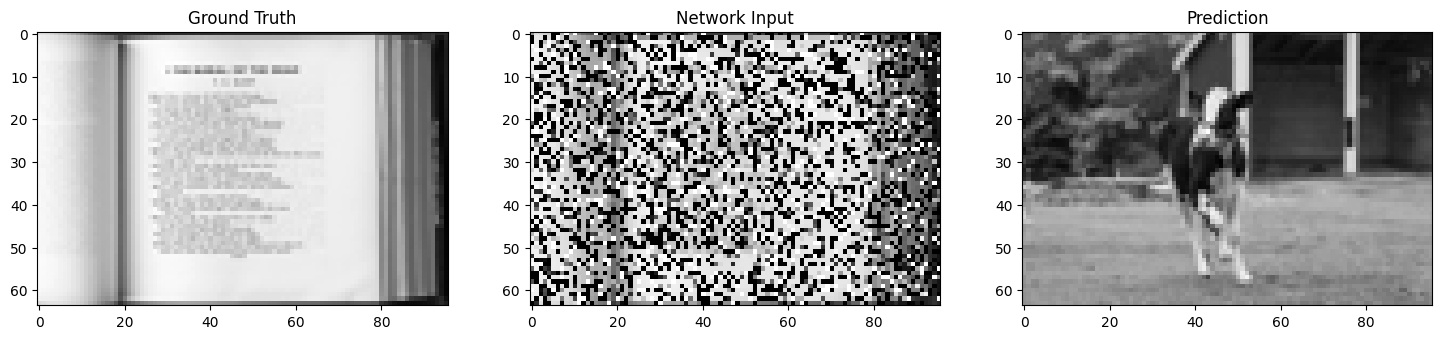

In [14]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

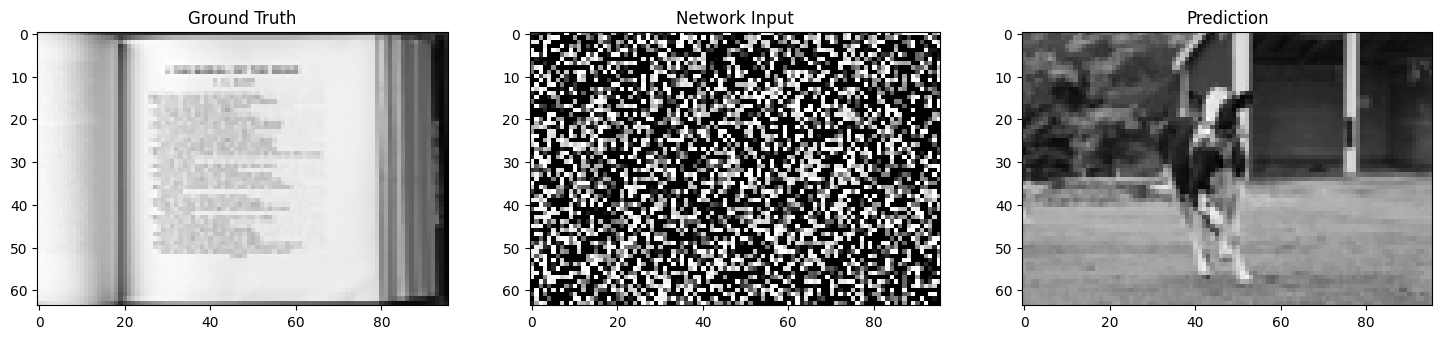

In [15]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_replace(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

## Corruption - Additive

In [16]:
from process_images import corruption_additive

### Low Noise

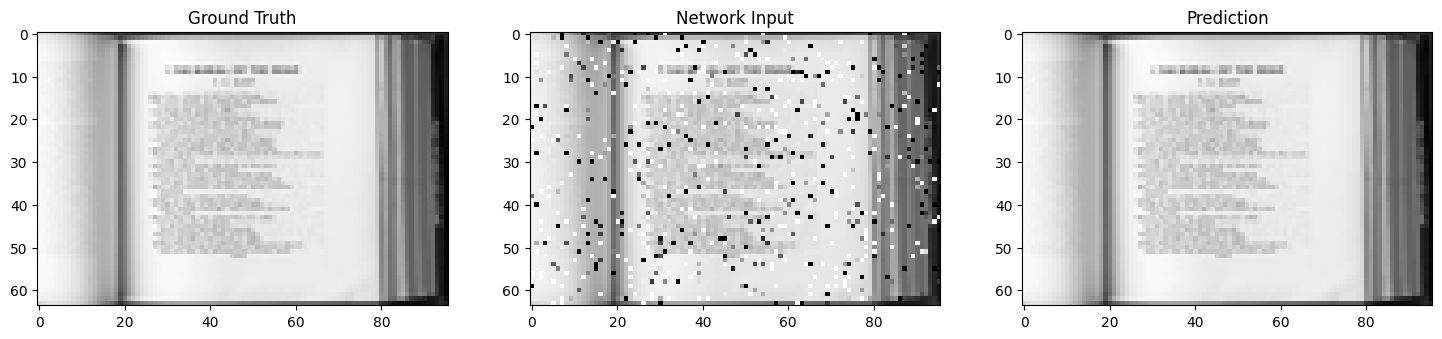

In [17]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

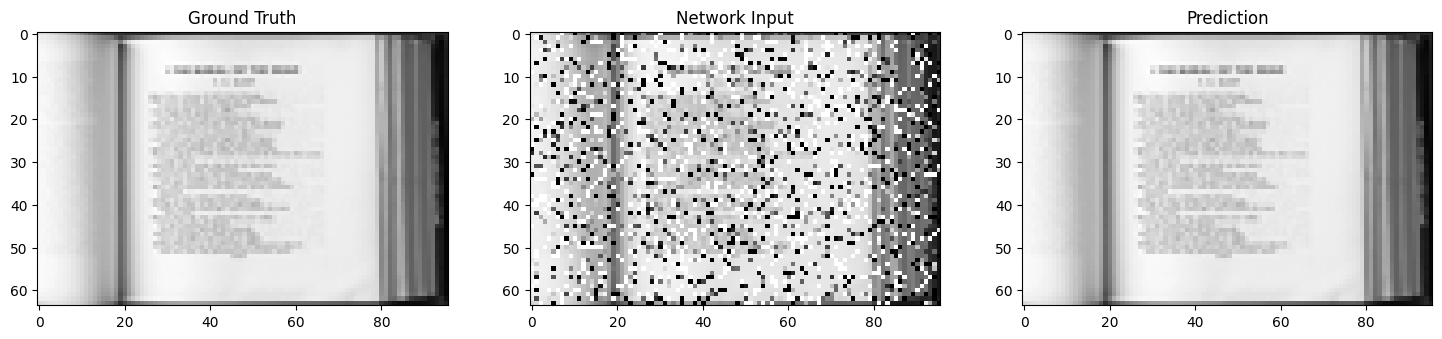

In [18]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

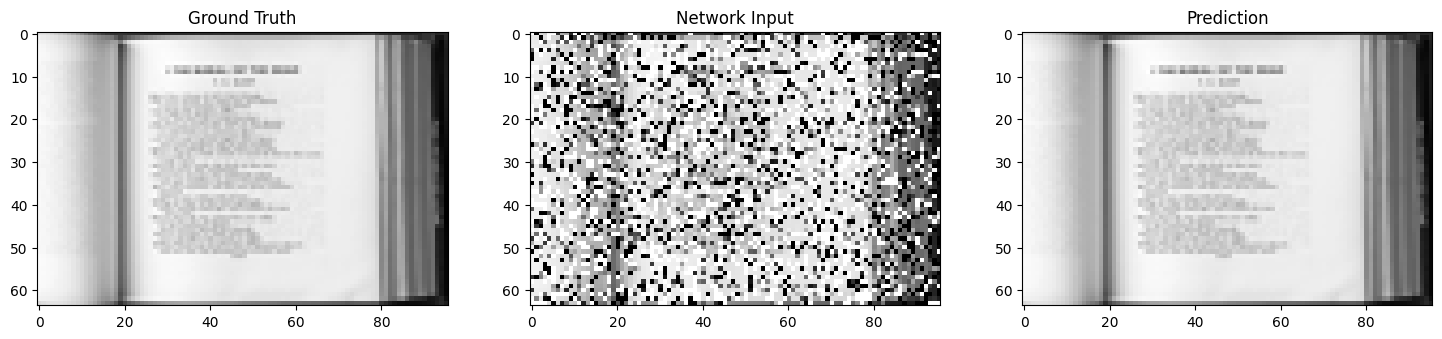

In [19]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

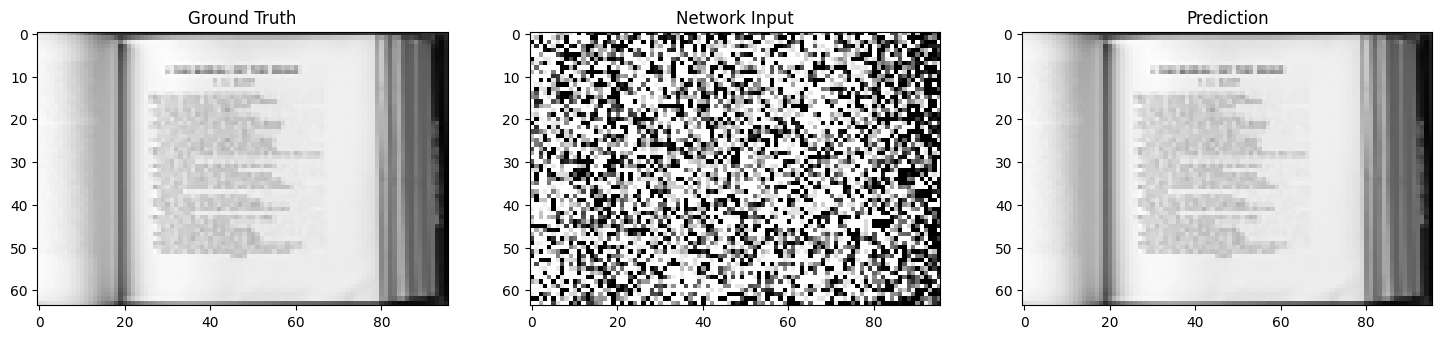

In [20]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_additive(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

## Blackouts - Revolving Lantern

In [21]:
from process_images import blackout_revolving_lantern

### Low Noise

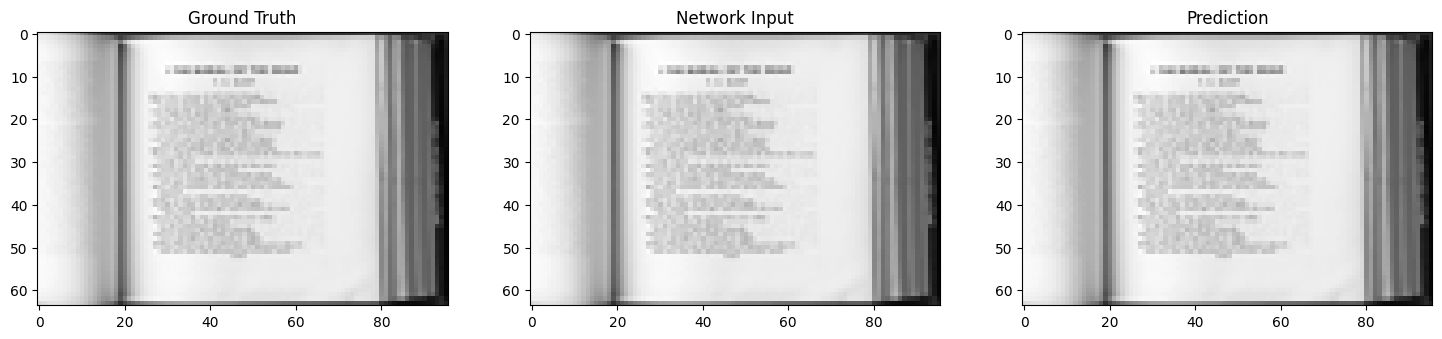

In [22]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

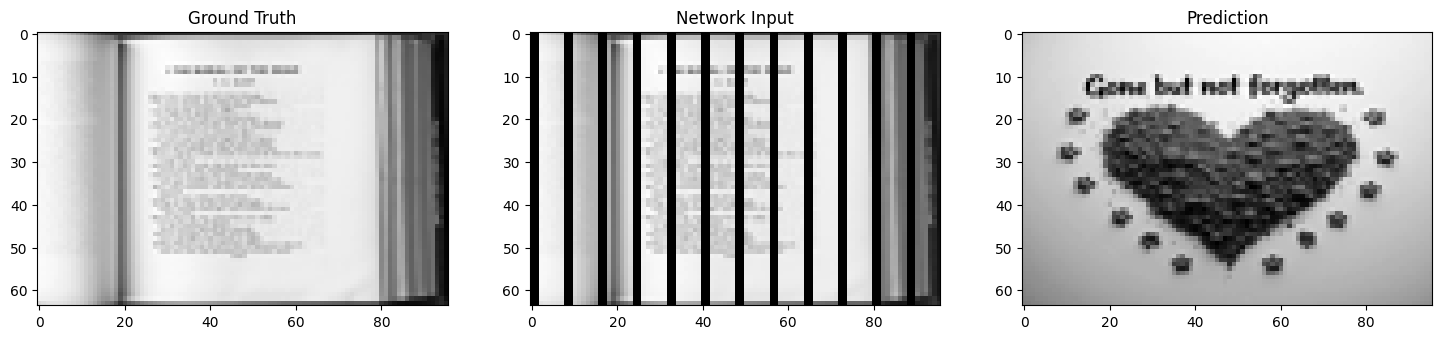

In [23]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

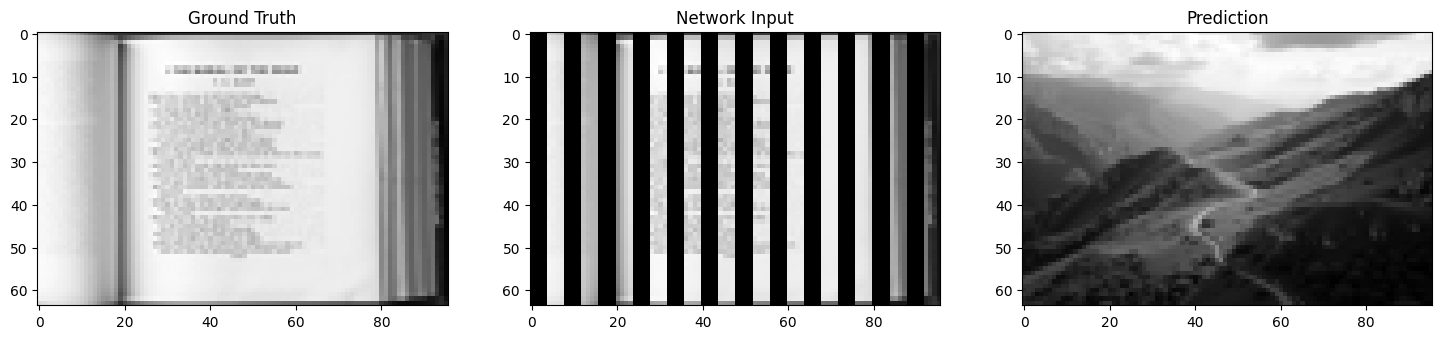

In [24]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

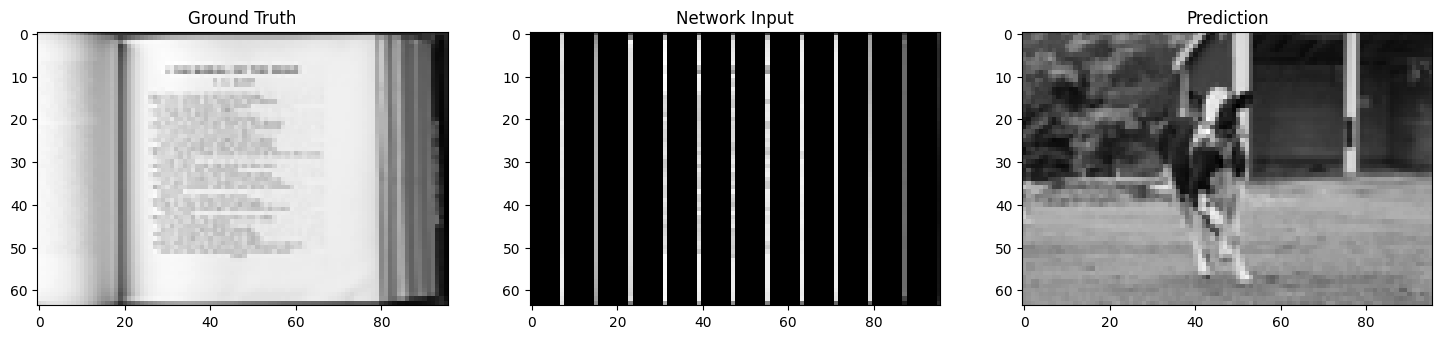

In [25]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackout_revolving_lantern(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [26]:
from process_images import corruption_revolving_lantern

### Low Noise

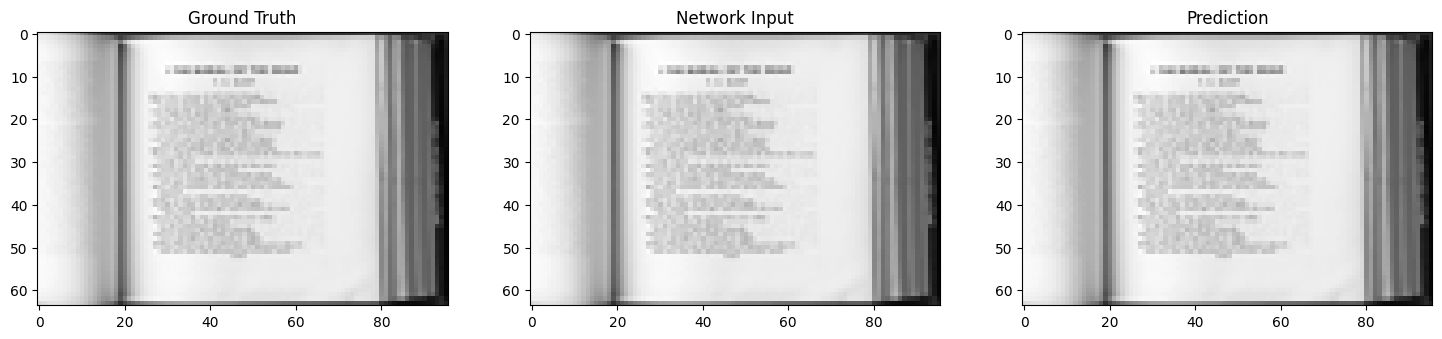

In [27]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

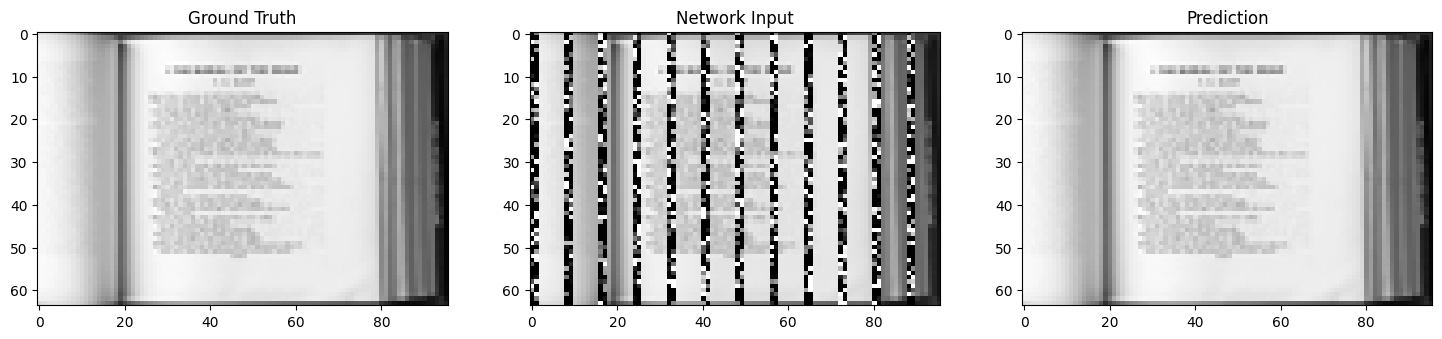

In [28]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

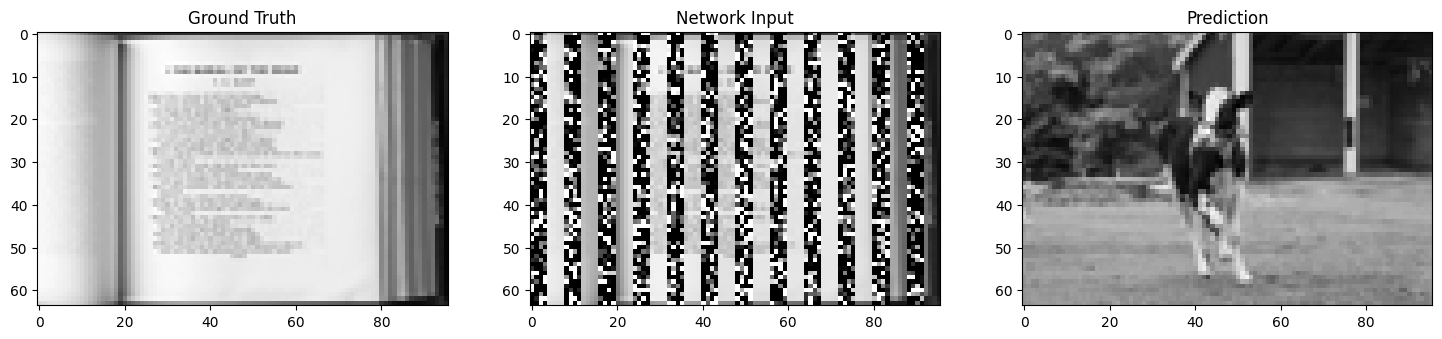

In [29]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

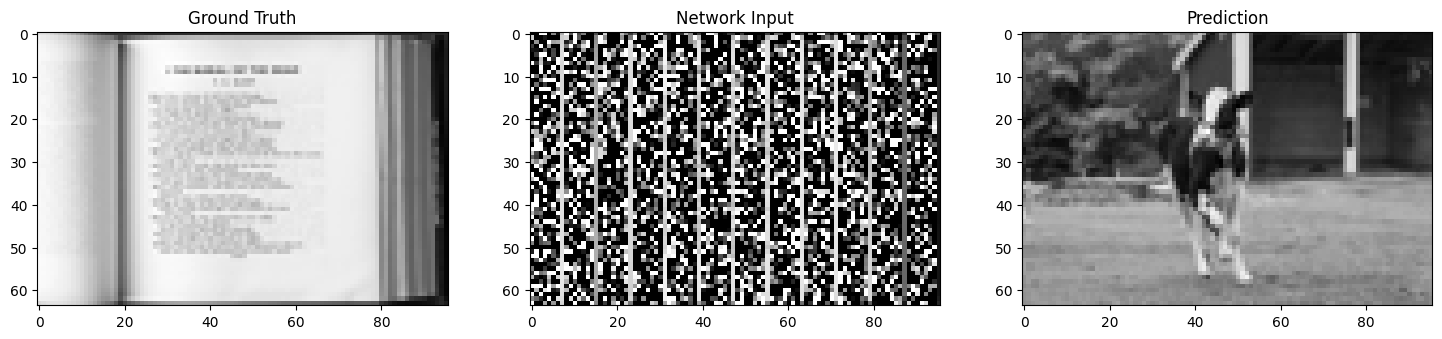

In [30]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [31]:
from process_images import blackouts

### Low Noise

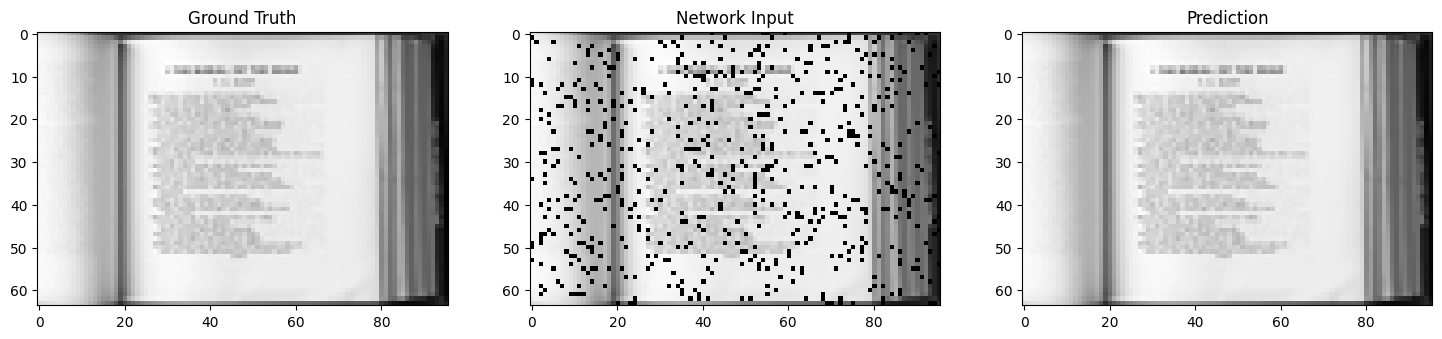

In [32]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

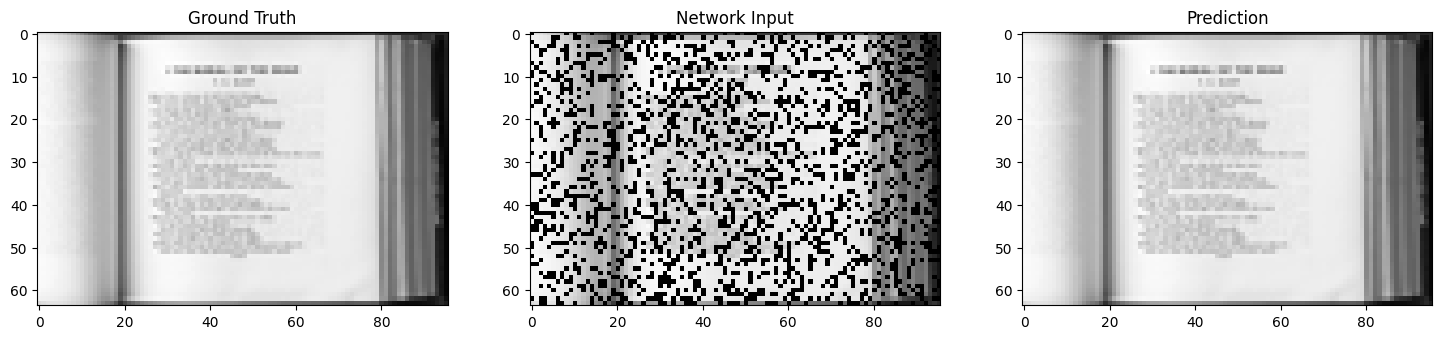

In [33]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

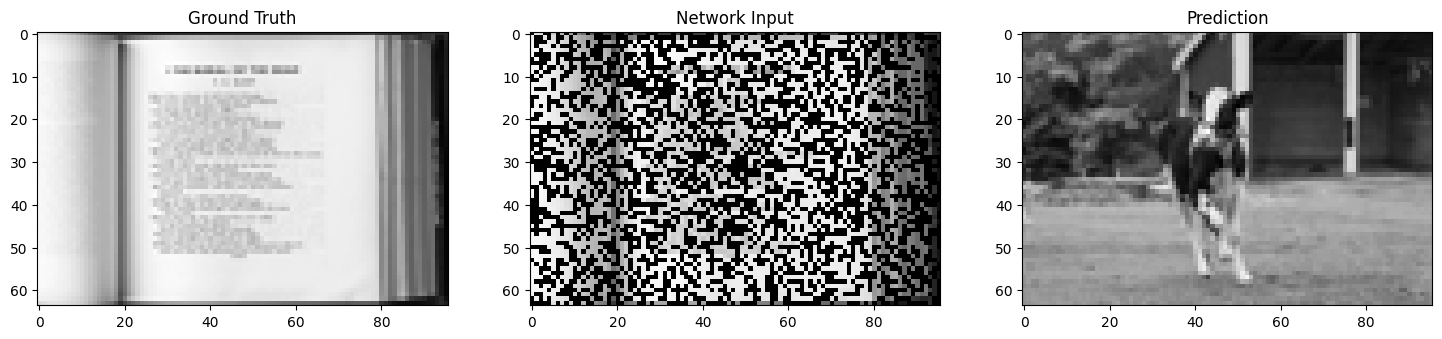

In [34]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

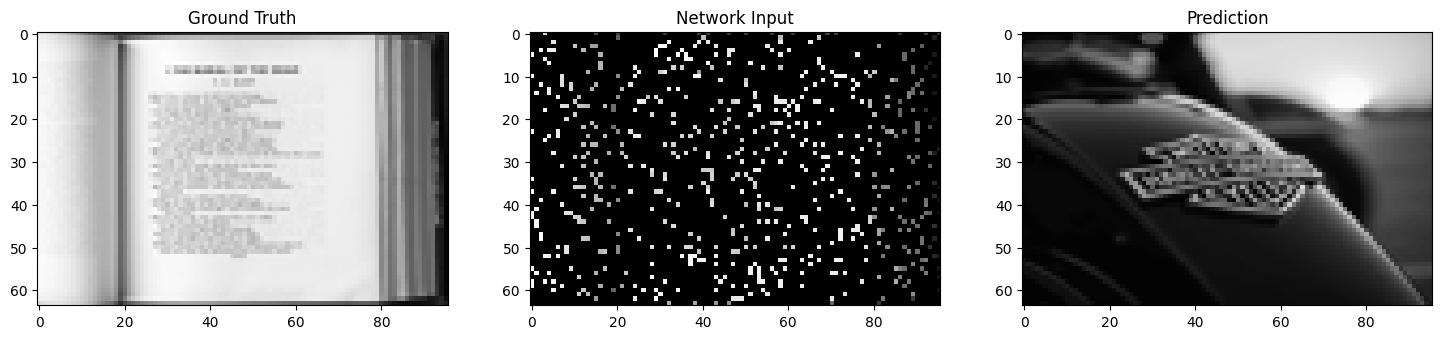

In [35]:
ground_truth = prepared[0].unsqueeze(0)
net_input = blackouts(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [36]:
from process_images import corruption_revolving_lantern

### Low Noise

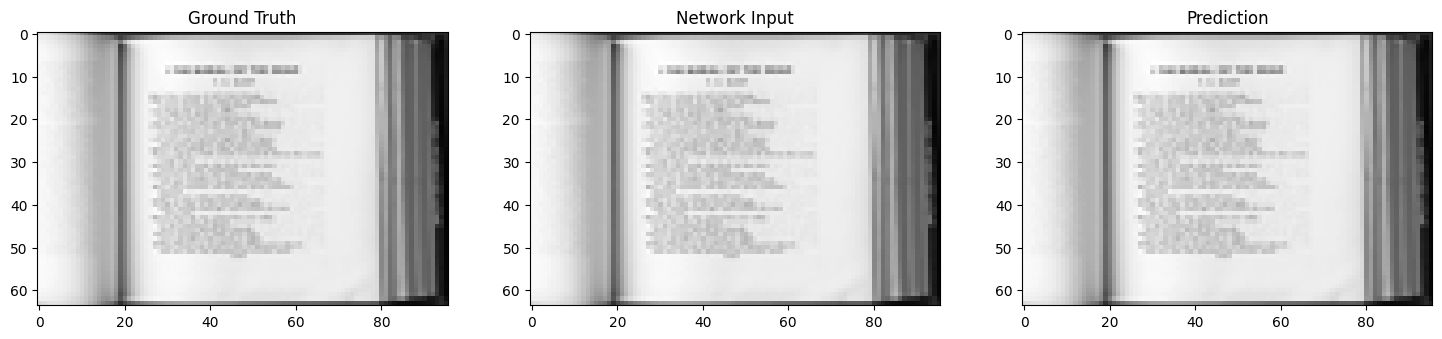

In [37]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.1)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Medium Noise

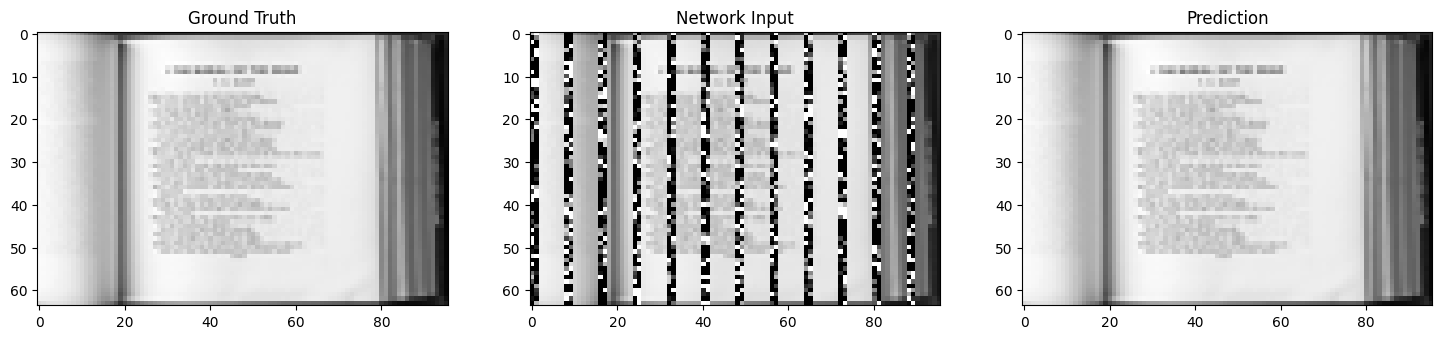

In [38]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.3)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### High Noise

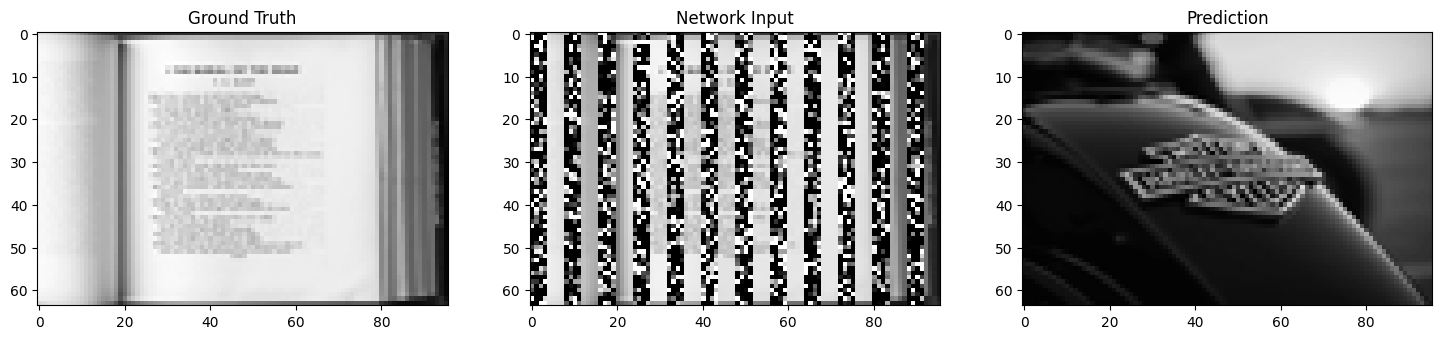

In [39]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.5)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

### Extreme Noise

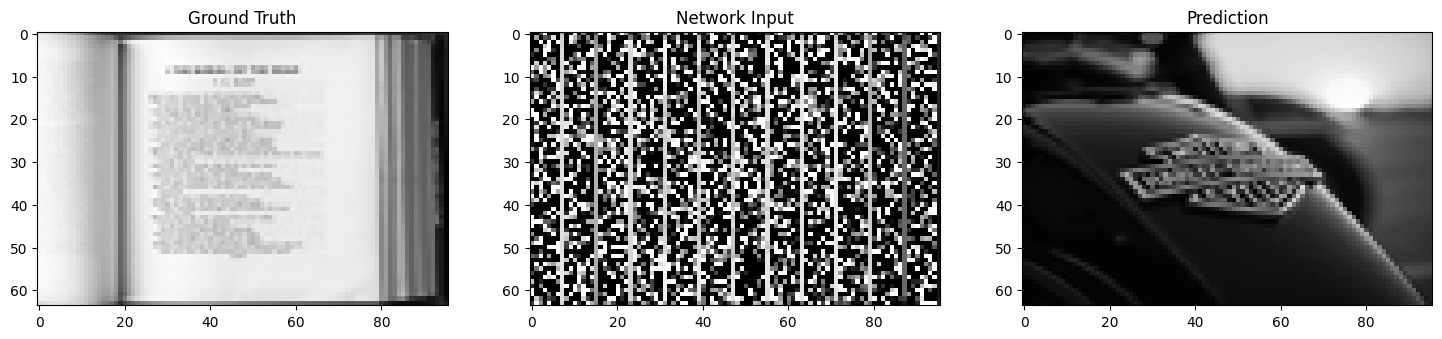

In [40]:
ground_truth = prepared[0].unsqueeze(0)
net_input = corruption_revolving_lantern(ground_truth, 0.9)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

In [41]:
from process_images import blackout_half

### Blackout - Left Half

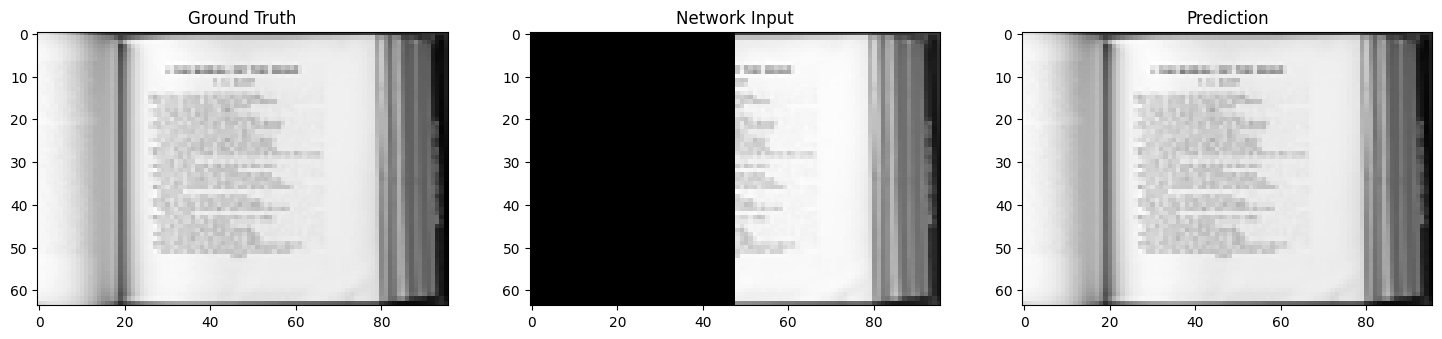

In [46]:
ground_truth = prepared[0].unsqueeze(0)

net_input = blackout_half(ground_truth.reshape(-1, height, width)).reshape(ground_truth.shape)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)

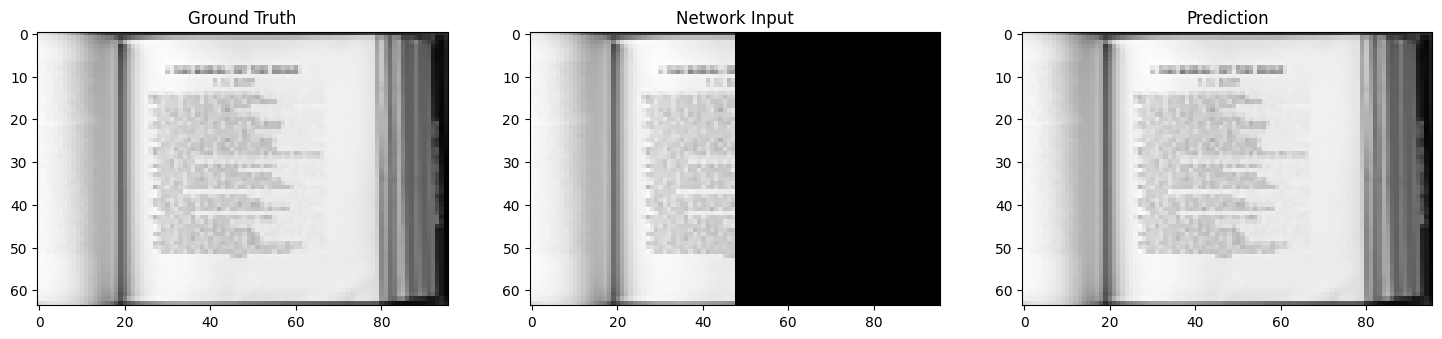

In [47]:
ground_truth = prepared[0].unsqueeze(0)

net_input = blackout_half(ground_truth.reshape(-1, height, width), right=True).reshape(ground_truth.shape)
images = {
    "Ground Truth": visualizable(ground_truth, height, width)[0],
    "Network Input": visualizable(net_input, height, width)[0],
    "Prediction": prediction(net_input.squeeze(), net, height, width)
}
plot_tensors(images)